In [2]:
import keras
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation,Input, Merge, add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import random

Using TensorFlow backend.


In [ ]:
x = data[['ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_06_bin', 'ps_ind_09_bin',
 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_car_03_cat',
 'ps_car_07_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14', 'ps_calc_06',
 'ps_calc_08', 'ps_ind_05_cat_0', 'ps_car_01_cat_7', 'd.4', 'd.8', 'd.13', 'd.14',
 'd.17', 'd.20', 'd.21', 'd.22', 'd.24', 'd.25', 'd.27', 'd.30', 'd.36', 'd.37',
 'd.38', 'd.40', 'd.42', 'd.43', 'd.45', 'd.50', 'd.55', 'd.56', 'd.57', 'd.58',
 'd.59', 'd.60', 'd.63', 'd.65', 'd.66', 'd.76', 'd.81', 'd.82', 'd.83']]


In [3]:
data = pd.read_csv('../Data/trainset_1120.csv')
x = data.drop(data.columns[[0, 1]], axis=1)
x = np.array(x)
y = data['target']
y = np.array(y)

In [5]:
random.seed(867)
train_index = np.random.choice(range(data.shape[0]),int(0.8*data.shape[0]))
validate_index=set(range(data.shape[0]))-set(train_index)
validate_index=np.array(list(validate_index),dtype='int64')

In [6]:
x_train = x[train_index,:]
x_validate = x[validate_index,:]
y_train = y[train_index]
y_validate = y[validate_index]

In [7]:
import keras.backend as K
import tensorflow as tf
def gini(actual, pred):
    pred = tf.argmax(pred, axis=1)
    actual = tf.argmax(actual, axis=1)
    nT = K.shape(pred)[0]
    n = K.cast(nT, dtype='int32')
    n_float = K.cast(nT, dtype=K.floatx())
    actual = K.reshape(actual,(1,n))[-1]
    pred = K.reshape(pred,(1,n))[-1]
    inds = tf.nn.top_k(pred, n)[1]
    a_s = K.gather(actual, inds)
    a_c = K.cumsum(a_s)
    s1 = K.sum(a_c)
    s2 = K.sum(a_s)
    giniSum = K.cast(tf.divide(s1,s2),dtype=K.floatx()) - K.cast(tf.divide(n+1,2),dtype=K.floatx())
    standard_gini = K.cast(tf.divide(giniSum,n_float),dtype=K.floatx())
    return standard_gini

def gini_normalized(a, p):
    norm_gini = K.cast(tf.divide(gini(a, p),gini(a, a)),dtype=K.floatx())
    return norm_gini


In [11]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight

array([  0.51911315,  13.57999658])

In [64]:

model = Sequential()
model.add(Dense(400, activation='relu', input_dim=new_x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer=sgd, 
              metrics=['accuracy',gini_normalized])#class_weight={0:class_weight[0],1:class_weight[1]}
model.fit(new_x_train, new_y_train, epochs=10, batch_size=1000)

In [23]:
# Convert to one-hot-vector
nb_classes = 2
OH_y_train = np.eye(nb_classes)[y_train]
OH_y_validate = np.eye(nb_classes)[y_validate]

##
model = Sequential()
model.add(Dense(203, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_interaction = model.fit(x_train, OH_y_train,epochs=100,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(x_validate, OH_y_validate))

Train on 476169 samples, validate on 267518 samples
Epoch 1/100
476169/476169 [==============================] - 10s 20us/step - loss: 4.5405 - acc: 0.4610 - gini_normalized: 0.0170 - val_loss: 0.2470 - val_acc: 0.9318 - val_gini_normalized: 0.0318
Epoch 2/100
476169/476169 [==============================] - 10s 20us/step - loss: 2.6231 - acc: 0.5220 - gini_normalized: 0.0294 - val_loss: 0.2135 - val_acc: 0.9407 - val_gini_normalized: 0.0330
Epoch 3/100
476169/476169 [==============================] - 10s 21us/step - loss: 2.0265 - acc: 0.5223 - gini_normalized: 0.0361 - val_loss: 0.2254 - val_acc: 0.9352 - val_gini_normalized: 0.0400
Epoch 4/100
476169/476169 [==============================] - 9s 19us/step - loss: 1.5015 - acc: 0.5244 - gini_normalized: 0.0382 - val_loss: 0.2586 - val_acc: 0.9301 - val_gini_normalized: 0.0357
Epoch 5/100
476169/476169 [==============================] - 8s 17us/step - loss: 1.0566 - acc: 0.5286 - gini_normalized: 0.0619 - val_loss: 0.2662 - val_acc: 0.

Epoch 42/100
476169/476169 [==============================] - 10s 21us/step - loss: 0.6239 - acc: 0.6078 - gini_normalized: 0.2846 - val_loss: 0.6302 - val_acc: 0.5937 - val_gini_normalized: 0.1292
Epoch 43/100
476169/476169 [==============================] - 10s 20us/step - loss: 0.6228 - acc: 0.6116 - gini_normalized: 0.2786 - val_loss: 0.8659 - val_acc: 0.3646 - val_gini_normalized: 0.0982
Epoch 44/100
476169/476169 [==============================] - 11s 23us/step - loss: 0.6223 - acc: 0.6120 - gini_normalized: 0.2898 - val_loss: 0.5992 - val_acc: 0.6611 - val_gini_normalized: 0.1296
Epoch 45/100
476169/476169 [==============================] - 9s 20us/step - loss: 0.6191 - acc: 0.6157 - gini_normalized: 0.2896 - val_loss: 0.4717 - val_acc: 0.8096 - val_gini_normalized: 0.0986
Epoch 46/100
476169/476169 [==============================] - 10s 21us/step - loss: 0.6196 - acc: 0.6154 - gini_normalized: 0.2934 - val_loss: 0.6187 - val_acc: 0.6153 - val_gini_normalized: 0.1104
Epoch 47/10

KeyboardInterrupt: 

In [19]:
# Convert to one-hot-vector
nb_classes = 2
OH_y_train = np.eye(nb_classes)[y_train]
OH_y_validate = np.eye(nb_classes)[y_validate]

##
model = Sequential()
model.add(Dense(100, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(80, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(20, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(10, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_interaction = model.fit(x_train, OH_y_train,epochs=100,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(x_validate, OH_y_validate))

Train on 476169 samples, validate on 267518 samples
Epoch 1/20
476169/476169 [==============================] - 47s 98us/step - loss: 8.0505 - acc: 0.9541 - gini_normalized: -0.0030 - val_loss: 0.5821 - val_acc: 0.9639 - val_gini_normalized: 0.0065
Epoch 2/20
476169/476169 [==============================] - 46s 96us/step - loss: 8.0988 - acc: 0.9632 - gini_normalized: 0.0032 - val_loss: 0.5821 - val_acc: 0.9639 - val_gini_normalized: 0.0065
Epoch 3/20
476169/476169 [==============================] - 47s 98us/step - loss: 5.6299 - acc: 0.9403 - gini_normalized: -0.0094 - val_loss: 0.6928 - val_acc: 0.9639 - val_gini_normalized: 0.0065
Epoch 4/20
476169/476169 [==============================] - 47s 98us/step - loss: 0.6961 - acc: 0.4660 - gini_normalized: 0.0023 - val_loss: 0.7012 - val_acc: 0.0361 - val_gini_normalized: 0.0065
Epoch 5/20
476169/476169 [==============================] - 47s 98us/step - loss: 0.6950 - acc: 0.1144 - gini_normalized: -0.0027 - val_loss: 0.6992 - val_acc: 0.

KeyboardInterrupt: 

In [176]:
# No interaction (raw) data
raw_x_train = x_train[:,0:x_train.shape[1]-91]
raw_x_validate = x_validate[:,0:x_validate.shape[1]-91]
##
model = Sequential()
model.add(Dense(100, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dense(80, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dense(20, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dense(10, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_raw = model.fit(raw_x_train, OH_y_train,epochs=100,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(raw_x_validate, OH_y_validate))

Train on 476169 samples, validate on 267789 samples
Epoch 1/100
476169/476169 [==============================] - 12s 26us/step - loss: 0.6792 - acc: 0.6200 - gini_normalized: 0.1119 - val_loss: 0.6520 - val_acc: 0.6594 - val_gini_normalized: 0.1563
Epoch 2/100
476169/476169 [==============================] - 7s 14us/step - loss: 0.6679 - acc: 0.6163 - gini_normalized: 0.1644 - val_loss: 0.6981 - val_acc: 0.5508 - val_gini_normalized: 0.1707
Epoch 3/100
476169/476169 [==============================] - 7s 14us/step - loss: 0.6652 - acc: 0.6065 - gini_normalized: 0.1718 - val_loss: 0.7006 - val_acc: 0.5431 - val_gini_normalized: 0.1762
Epoch 4/100
476169/476169 [==============================] - 7s 15us/step - loss: 0.6638 - acc: 0.6088 - gini_normalized: 0.1834 - val_loss: 0.6971 - val_acc: 0.5536 - val_gini_normalized: 0.1784
Epoch 5/100
476169/476169 [==============================] - 7s 15us/step - loss: 0.6628 - acc: 0.6104 - gini_normalized: 0.1845 - val_loss: 0.6242 - val_acc: 0.67

Epoch 84/100
476169/476169 [==============================] - 7s 14us/step - loss: 0.5917 - acc: 0.6616 - gini_normalized: 0.3646 - val_loss: 0.6527 - val_acc: 0.6060 - val_gini_normalized: 0.1192
Epoch 85/100
476169/476169 [==============================] - 7s 14us/step - loss: 0.5913 - acc: 0.6623 - gini_normalized: 0.3655 - val_loss: 0.8733 - val_acc: 0.3966 - val_gini_normalized: 0.1142
Epoch 86/100
476169/476169 [==============================] - 7s 16us/step - loss: 0.5882 - acc: 0.6628 - gini_normalized: 0.3669 - val_loss: 0.3393 - val_acc: 0.8881 - val_gini_normalized: 0.0723
Epoch 87/100
476169/476169 [==============================] - 7s 14us/step - loss: 0.5892 - acc: 0.6659 - gini_normalized: 0.3729 - val_loss: 0.5523 - val_acc: 0.7069 - val_gini_normalized: 0.1250
Epoch 88/100
476169/476169 [==============================] - 6s 14us/step - loss: 0.5863 - acc: 0.6662 - gini_normalized: 0.3744 - val_loss: 0.5055 - val_acc: 0.7479 - val_gini_normalized: 0.1279
Epoch 89/100
47

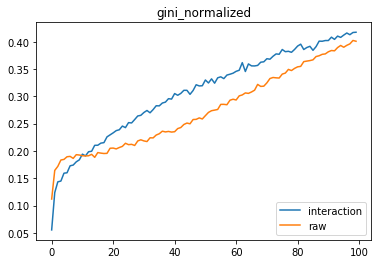

In [177]:
plt.title('gini_normalized')
plt.plot(nn_interaction.history['gini_normalized'],label='interaction')
plt.plot(nn_raw.history['gini_normalized'],label='raw')
plt.legend(loc=4)
plt.show()


In [1]:
plt.title('gini_normalized')
plt.plot(nn_interaction.history['gini_normalized'],label='interaction')
plt.plot(nn_raw.history['gini_normalized'],label='raw')
plt.legend(loc=4)
plt.show()


NameError: name 'plt' is not defined

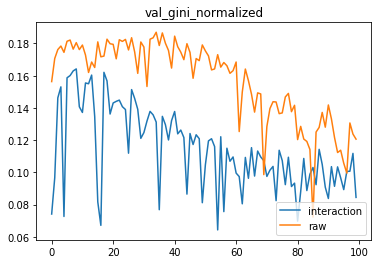

In [178]:
plt.title('val_gini_normalized')
plt.plot(nn_interaction.history['val_gini_normalized'],label='interaction')
plt.plot(nn_raw.history['val_gini_normalized'],label='raw')
plt.legend(loc=4)
plt.show()
